Please click below to open this notebook with colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Htc4I3VErlfaYivsK_g08KDocEUmKeO2?usp=sharing)

In [ ]:
# Installing required packages
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Erdos-Renyi Model

In [ ]:
def generate_er(n=25, r=0.1):
    """ Function to generate graph networks using 
    Erdos-Renyi Model

    Parameters
    ----------
    n: int
      Number of nodes
    r: float
      probability of the edge

    Returns
    -------
    random ER graph
    """
    return nx.erdos_renyi_graph(n, r, seed=42)

def plot_er(G, n):
    """ Plots the Erdos-Renyi graph

    Parameters
    ----------
    G: graph
    n: int
      Number of nodes

    Returns
    -------
    None
    """
    # Put the nodes in a circular shape
    pos = nx.circular_layout(G)
    #pos = nx.spring_layout(G, iterations=50, seed=42)
    nx.draw(G, pos, node_color=range(25), node_size=400, cmap=plt.cm.Blues)
    plt.show()

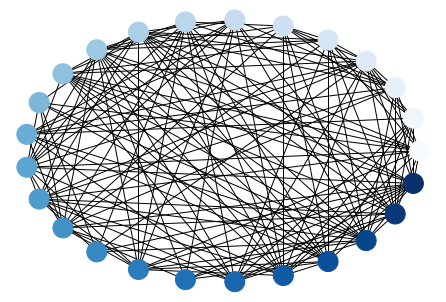

In [ ]:
# Example of the Erdos-Renyi graph generation
n=25
p=0.5
G_er = generate_er(n, p)
plot_er(G_er, n)

# Stochastic Block Models


In [ ]:
from community import community_louvain

def generate_sbm(size, probs, seed):
    """ Function to generate graph networks using 
    Stochastic Block Model

    Parameters
    ----------
    n: int
      Number of nodes
    r: float
      probability of the edge

    Returns
    -------
    random graph
    """
    return nx.stochastic_block_model(size, probs, seed=seed)

def plot_sbm(G, seed):
    """ Plots the Stochastic Block Model graph

    Parameters
    ----------
    G: graph
    seed: int
      random seed

    Returns
    -------
    None
    """
    partition = community_louvain.best_partition(G, random_state=seed)
    pos = community_layout(G, partition, seed)
    nx.draw(G, pos, node_color=list(partition.values()))
    plt.show()

# The remaining code below is taken from Paul Brodersen StackOverflow answer
# https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx
# The code is used to plot the generated graph nicely
def community_layout(g, partition, seed=42):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3., seed=seed)

    pos_nodes = _position_nodes(g, partition, scale=1., seed=seed)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos  

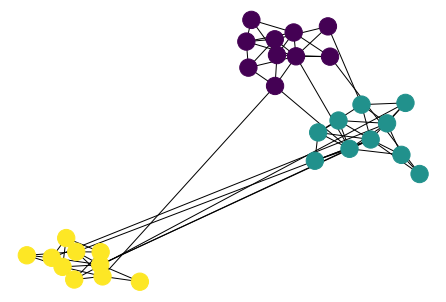

In [ ]:
# Set size of each community
community_sizes = [10, 10, 10]
# Edge probabilities between each community
community_probs = [[0.5, 0.05, 0.02], 
                   [0.05, 0.5, 0.07], 
                   [0.02, 0.07, 0.5]]
seed=42

G_sbm = generate_sbm(community_sizes, community_probs, seed)
plot_sbm(G_sbm, seed)

# Barabási-Albert Preferential Attachment model

In [ ]:
def generate_pa(m, n, seed):
      """ Function to generate graph networks using 
    Preferential Attachment Model

    Parameters
    ----------
    m: int
      Number of nodes
    n: int
      Number of edges to attach from a new node to existing nodes
    seed: int
      random seed
    Returns
    -------
    random graph
    """
    return nx.generators.random_graphs.barabasi_albert_graph(m, n, seed)

def plot(G, seed):
    """ Plots the PA Model graph

    Parameters
    ----------
    G: graph
    seed: int
      random seed

    Returns
    -------
    None
    """
    partition = community_louvain.best_partition(G, random_state=seed)
    pos = community_layout(G, partition, seed)
    nx.draw(G, pos, node_color=list(partition.values()))
    plt.show()

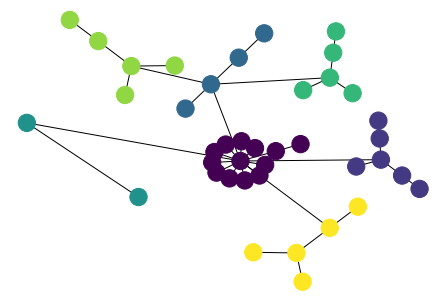

In [ ]:
seed=42
m=40
n=1

G_pa = generate_pa(m, n, seed)
plot(G_pa, seed)